In [77]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import h5py
from scipy import io
import os
import glob
import pywt

preparing data for training

(179, 500, 1)


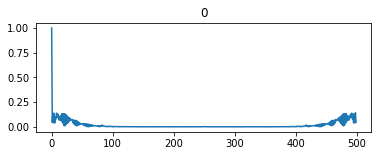

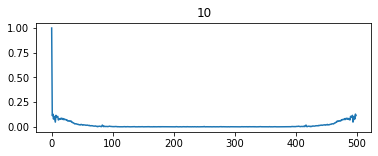

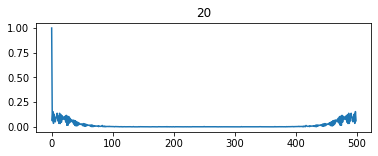

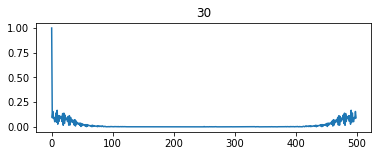

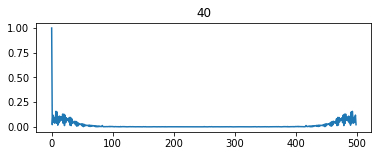

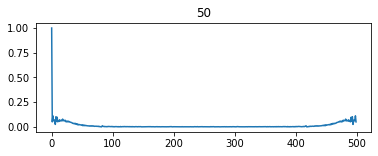

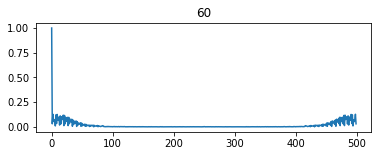

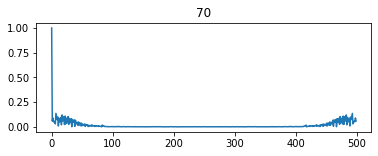

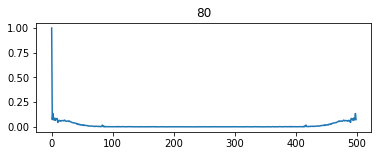

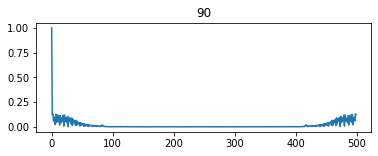

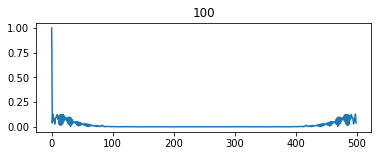

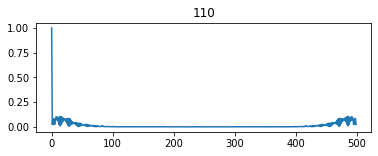

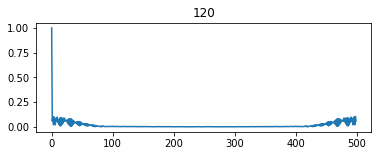

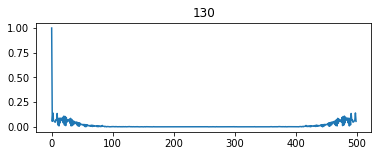

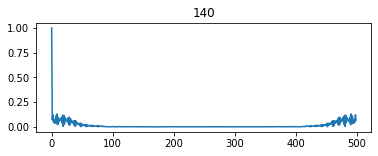

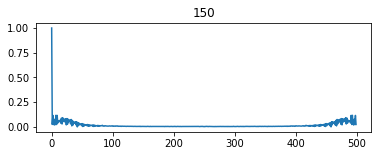

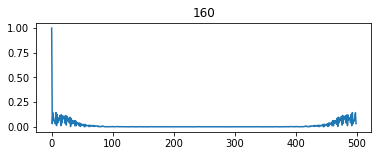

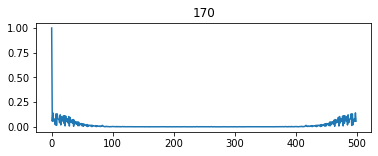

In [78]:
arr = []
for file in glob.glob('MLII/1 NSR/*.mat'):
    arr.append(file) 

arr = sorted(arr, key=lambda x:x[:])

l = 1 #283
d = 3600
w = 500 #3600
st = 20
hwm = 450
stride = 1
data = []
for i in range(l):
    db = io.loadmat(arr[i]) 
    dummy = db['val'][0, :]
    dummy = np.append(dummy, dummy[0:w-st])

    for j in range(hwm):
        if j*st+w >= len(dummy): 
            break;
        min = np.amin(dummy[j*st:j*st+w])
        max = np.amax(dummy[j*st:j*st+w])
        ddata = (dummy[j*st:j*st+w]-min)/(max-min)
        ddata = np.abs(np.fft.fft(ddata))
        min = np.amin(ddata)
        max = np.amax(ddata)
        ddata = (ddata-min)/(max-min)
        ddl = np.int(len(ddata)/1.0)
        data.append(ddata[0:ddl])
data = np.asarray(data).reshape(len(data), ddl, 1)[:, ::stride] 

seq_in = np.copy(data)
print (seq_in.shape)  

for i in range(0,len(seq_in),10):
    plt.figure(figsize=(6, 2))
    plt.plot(seq_in[i, :, 0])
    plt.title(np.str(i))

In [79]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense, Reshape, Dropout, LSTM, Bidirectional, ConvLSTM2D, MaxPooling1D, Conv1D, Flatten
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils import plot_model
from keras.regularizers import l1_l2
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

In [82]:
n_in = seq_in.shape[1]
optimizer = Adam(0.0002, 0.5)

# define model
model = Sequential()

# define encoder
model.add(LSTM(200, activation='relu', input_shape=(n_in, 1)))
model.add(Dropout(0.4)) 
# define decoder
model.add(RepeatVector(n_in))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer=optimizer, loss='mse')

#n_out = np.int(n_in/5.0)
#seq_out = seq_in[:, n_out:, :]

## define encoder
#visible = Input(shape=(n_in, 1))
#encoder = LSTM(100, activation='relu')(visible)
## define reconstruct decoder
#decoder1 = RepeatVector(n_in)(encoder)
#decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
#decoder1 = TimeDistributed(Dense(1))(decoder1)
## define predict decoder
#decoder2 = RepeatVector(n_out)(encoder)
#decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
#decoder2 = TimeDistributed(Dense(1))(decoder2)
## tie it together
#model = Model(inputs=visible, outputs=[decoder1, decoder2])
#model.compile(optimizer=optimizer, loss='mse')

In [83]:
# fit model
model.fit(seq_in, seq_in, epochs=50, verbose=1)
#model.fit(seq_in, [seq_in,seq_out], epochs=300, verbose=0)

Epoch 1/50
179/179 [==============================] - 12s 68ms/step - loss: 0.0028
Epoch 2/50
179/179 [==============================] - 9s 50ms/step - loss: 0.0027
Epoch 3/50
179/179 [==============================] - 8s 46ms/step - loss: 0.0027
Epoch 4/50
179/179 [==============================] - 8s 46ms/step - loss: 0.0027
Epoch 5/50
179/179 [==============================] - 8s 46ms/step - loss: 0.0027
Epoch 6/50
179/179 [==============================] - 8s 47ms/step - loss: 0.0027
Epoch 7/50
179/179 [==============================] - 8s 46ms/step - loss: 0.0027
Epoch 8/50
179/179 [==============================] - 8s 46ms/step - loss: 0.0027
Epoch 9/50
179/179 [==============================] - 8s 46ms/step - loss: 0.0027
Epoch 10/50
179/179 [==============================] - 9s 48ms/step - loss: 0.0027
Epoch 11/50
179/179 [==============================] - 8s 47ms/step - loss: 0.0026
Epoch 12/50
179/179 [==============================] - 8s 47ms/step - loss: 0.0026
Epoch 13/50


1/1 [==============================] - 0s 88ms/step


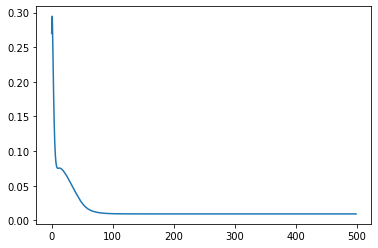

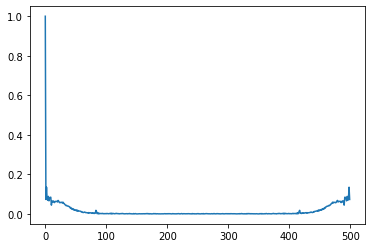

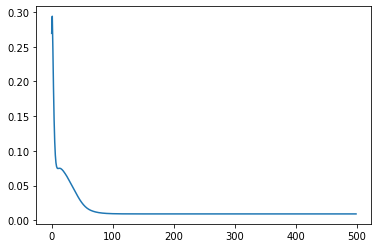

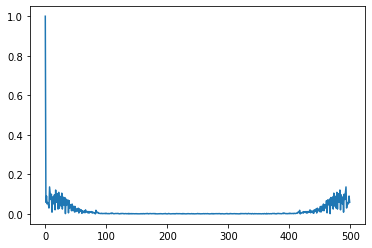

In [84]:
# demonstrate recreation
yhat = model.predict(seq_in[80:81], verbose=1)
plt.figure()
plt.plot(yhat[0, :, 0])
plt.figure()
plt.plot(seq_in[80, :, 0])

yhat = model.predict(seq_in[70:71], verbose=1)
plt.figure()
plt.plot(yhat[0, :, 0])
plt.figure()
plt.plot(seq_in[70, :, 0])

1/1 [==============================] - 0s 117ms/step


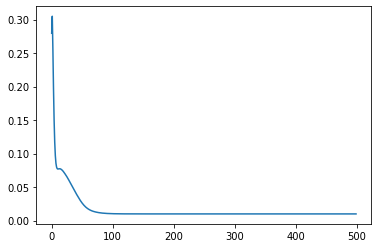

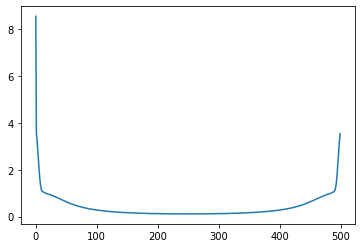

In [85]:
yhat = model.predict(seq_in[1:2], verbose=1)
plt.figure()
plt.plot(yhat[0, :, 0])

ddata = np.abs(np.fft.fft(yhat[0,:,0]))
plt.figure()
plt.plot(ddata)